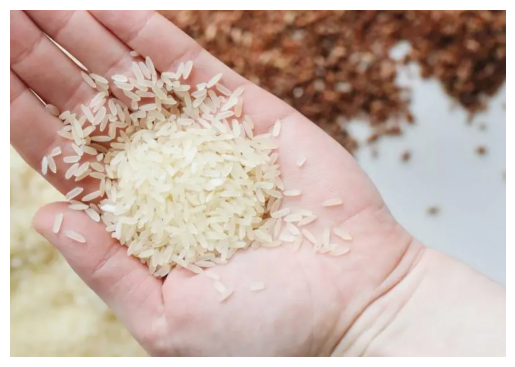

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/kaggle/input/picture/Baldo-Cooking-Rice-Turkish-Export.jpg.webp"  
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  
plt.show()

# <span style="color: #2E8B57;"> 1 | Introduction</span>

<div style="background-color: #2E8B57; color: white; padding: 10px; border-radius: 15px;">

### 🌾 1.1 | Project Overview

</div>

<span style="color: black;">

Rice is an essential staple food and one of the most **widely cultivated grains** globally, sustaining millions of people and contributing significantly to various countries' agricultural economies. Each rice variety possesses **distinct genetic characteristics**—such as **texture, shape, and color**—which serve as critical indicators of quality and play a crucial role in **classification**. By understanding these characteristics, researchers and producers can develop efficient methods for **quality control** and **varietal identification**. 

This project specifically investigates five prominent rice varieties frequently grown in Turkey: **Arborio, Basmati, Ipsala, Jasmine,** and **Karacadag**. Each of these varieties is known for its **unique qualities**—from Arborio’s suitability for risotto due to its creamy texture to Basmati’s characteristic aroma and long grains. The dataset used in this study consists of **75,000 images** (with **15,000 images** for each variety), capturing diverse visual features across the varieties. In addition to the image dataset, a **secondary feature dataset** is available, containing **106 attributes** derived from the images, categorized into **12 morphological** features (such as length and width), **4 shape** features, and **90 color attributes** (capturing subtle color differences across varieties).

For the classification task, machine learning models were applied to both the feature and image datasets. The **Artificial Neural Network (ANN)** and **Deep Neural Network (DNN)** models were employed to analyze the feature dataset, leveraging the extracted characteristics to differentiate among the varieties. On the other hand, a **Convolutional Neural Network (CNN)** was implemented for the image dataset, capitalizing on CNN’s capability to automatically detect **complex patterns** and **visual features** in images. The use of CNN is especially valuable here, as it can identify intricate details like **edges, corners, grain structure,** and **color variations**, which are crucial for distinguishing rice varieties based on images alone.

The performance of these models was evaluated using a comprehensive set of metrics, including **sensitivity** (the model’s ability to correctly identify positive instances), **specificity** (its ability to identify negative instances), **precision** (the proportion of true positives among predicted positives), **F1 score** (the harmonic mean of precision and recall), **accuracy** (the overall correctness of the model), **false positive rate** (the rate at which incorrect positive predictions are made), and **false negative rate** (the rate at which incorrect negative predictions are made). These metrics provide a robust evaluation framework, allowing us to assess the models' strengths and identify areas for improvement.

A **Convolutional Neural Network (CNN)** was chosen for the image dataset due to its proven effectiveness in **image recognition and classification tasks**. CNNs excel in visual data analysis as they use a hierarchical structure to learn features at multiple levels—from simple edges to complex textures and patterns. This ability makes CNNs particularly suitable for the rice classification task, where fine visual distinctions between varieties are critical.

The primary objective of this project is to develop an efficient, high-performing machine learning model that can accurately classify rice images by variety using **PyTorch** as the implementation framework. Achieving a high accuracy in this classification task has significant implications: an automated system capable of identifying and categorizing rice types could support **quality control** processes in the rice industry, aid **agricultural research** by providing insights into varietal traits, and facilitate **crop management** through accurate variety identification. Ultimately, this project aims to contribute to the enhancement of quality standards in rice production and to support the **agricultural sector in Turkey** by offering a powerful tool for variety classification.

</span>
ification.

</span>
urkey.

</span>


</span>


</span>


In [2]:
# install some requirement libraries
!pip install split-folders
!pip install torch-summary

# <span style="color: #006400;">2 | Import Libraries & Dataset</span>

<div style="background-color: #006400; color: white; padding: 10px; border-radius: 15px;">

### 📘 2.1 | Importing Required Libraries and Loading the Dataset

</div>

<span style="color: black;">

In this section, we will import the essential libraries needed to build and evaluate our rice classification model. We will also load the datasets containing both the image and feature data for the five Turkish rice varieties: Arborio, Basmati, Ipsala, Jasmine, and Karacadag. The libraries include PyTorch for model development, as well as libraries for data manipulation, visualization, and evaluation.

</span>


In [3]:
# import requirement libraries and tools
import time
import torch.optim as optim
import os
import sys
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import splitfolders
import itertools
from pathlib import Path
from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from termcolor import colored

from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from torchsummary import summary

In [4]:
# dataset path
data_path = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'
data_path = pathlib.Path(data_path)

In [5]:
# Splitting the dataset into training (70%), validation (15%), and test (15%) sets
splitfolders.ratio(
    input=data_path, 
    output='rice_imgs',  # Output folder name
    seed=42, 
    ratio=(0.7, 0.15, 0.15)
)

Copying files: 75000 files [02:46, 449.66 files/s] 


# <span style="color: #006400;">3 | Preparing Dataset</span>

In [6]:
# Define batch size
batch_size = 32

# Define transformation with simpler normalization for grayscale images
transform = transforms.Compose([
    transforms.Resize((250, 250)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalization for grayscale images
])

# Data loading function
def load_data(folder_name):
    dataset_path = pathlib.Path('rice_imgs') / folder_name
    dataset = torchvision.datasets.ImageFolder(root=dataset_path, transform=transform)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    # Print dataset information
    print(f'{folder_name.capitalize()} dataset:')
    print(f"  Number of datapoints: {len(dataset)}")
    print(f"  Classes: {dataset.classes}")
    return data_loader

# Load train, validation, and test data
train_loader = load_data('train')
val_loader = load_data('val')
test_loader = load_data('test')

# Class names (matching folder structure)
class_names = ("Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag")


Train dataset:
  Number of datapoints: 52500
  Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Val dataset:
  Number of datapoints: 11250
  Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Test dataset:
  Number of datapoints: 11250
  Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [7]:
# Define the data loaders for Train, Validation, and Test datasets
data_loaders = {
    'Train': train_loader,
    'Validation': val_loader,
    'Test': test_loader
}

# Display the shape of the dataset for each set (Train, Validation, Test)
for dataset_name, data_loader in data_loaders.items():
    # Loop through the first batch of each data loader
    for images, labels in data_loader:
        # Print the dataset name in light blue
        print(colored(f'{dataset_name}:', 'light_blue'))
        
        # Output the shape of the images (X) tensor in green
        print(colored(f"Images shape [Batch_size, Channels, Height, Width]: {images.shape}", 'green'))
        
        # Output the shape and data type of the labels (y) tensor in yellow
        print(colored(f"Labels shape: {labels.shape}, Data type: {labels.dtype}", 'yellow'))
        
        # Only show the first batch for brevity
        break


Train:
Images shape [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Labels shape: torch.Size([32]), Data type: torch.int64
Validation:
Images shape [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Labels shape: torch.Size([32]), Data type: torch.int64
Test:
Images shape [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Labels shape: torch.Size([32]), Data type: torch.int64


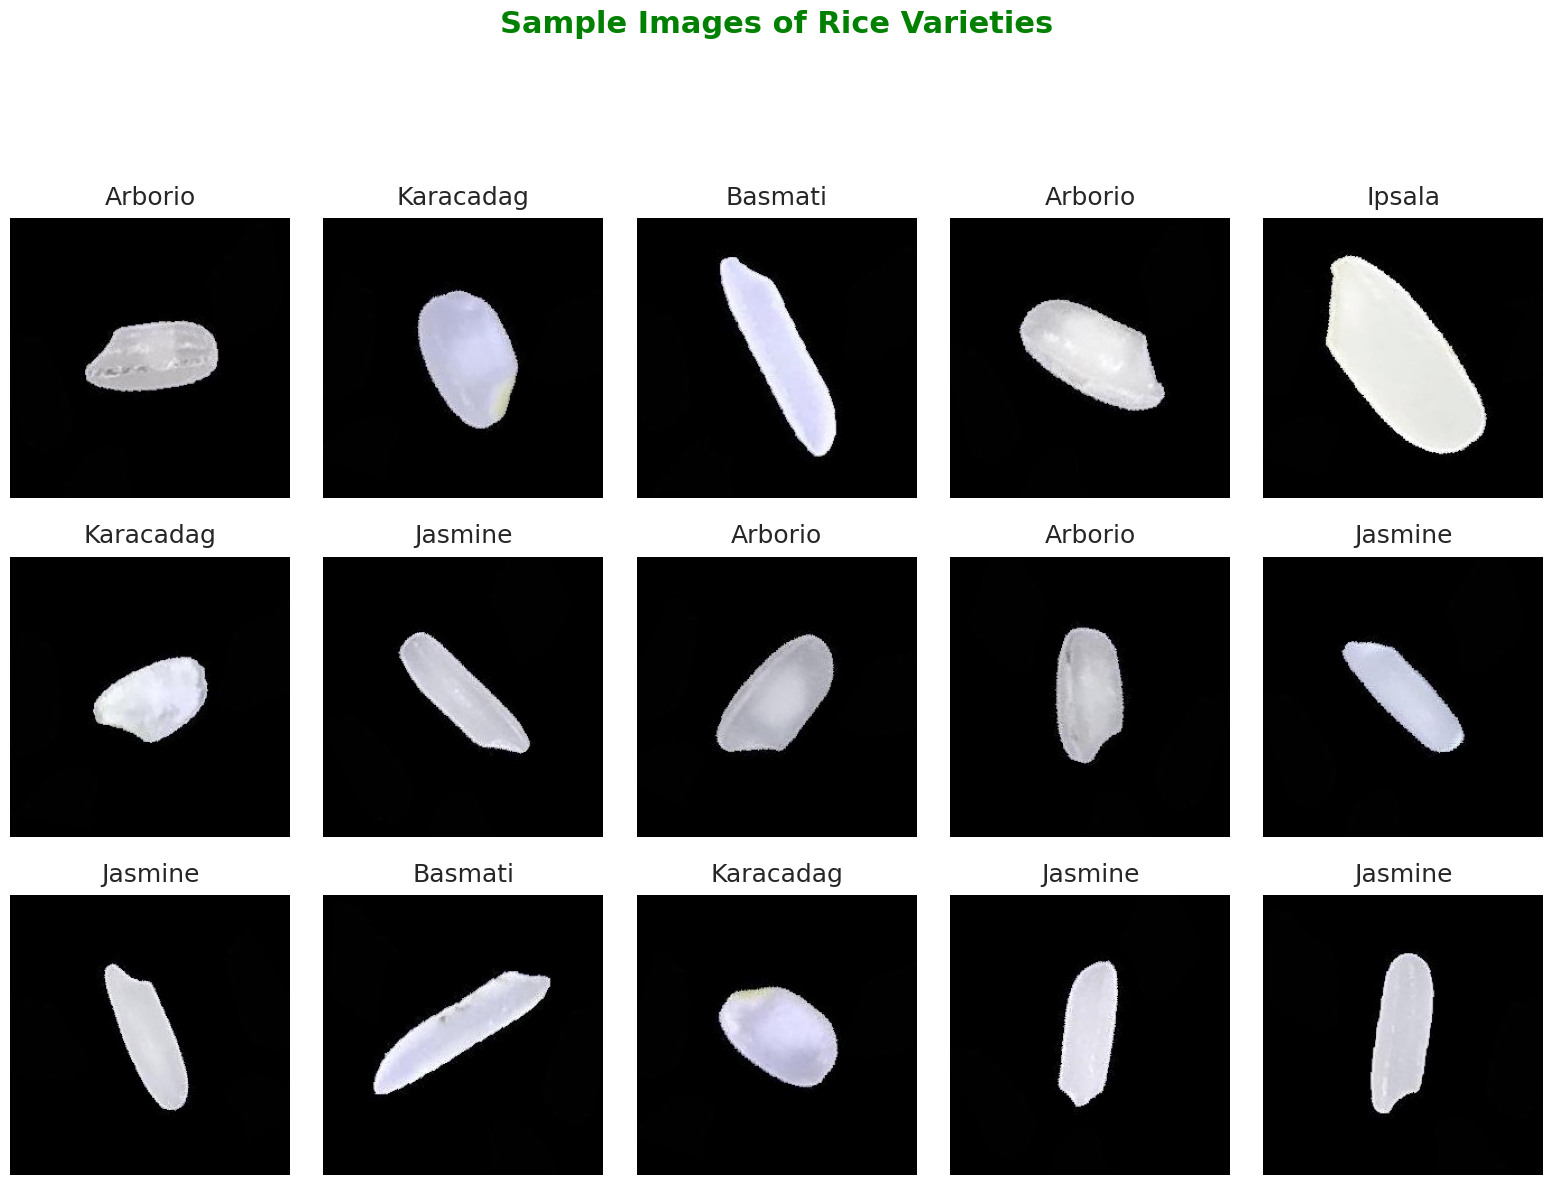

In [12]:
# Define function to visualize sample images
def visualize_sample_images(data_loader, title="Sample Images of Rice Varieties"):
    # Define class names manually
    class_names = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]  # List of class names
    
    images, labels = next(iter(data_loader))  # Get one batch of data
    plt.figure(figsize=(16, 12))  # Adjust the figure size
    
    for i in range(15):  # Display 15 sample images
        plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns layout for 15 images
        
        # Convert torch tensor to NumPy array and permute dimensions to (Height, Width, Channels)
        image = images[i].permute(1, 2, 0).numpy()  # Change the order of dimensions for displaying the image
        
        # Reverse normalization (multiply by std and add mean)
        image = image * 0.5 + 0.5  # Since we used (0.5, 0.5, 0.5) for mean and std in normalization
        
        # Clamp the image values to the range 0 to 1
        image = np.clip(image, 0, 1)

        plt.imshow(image)  # Display as RGB image
        # Set title with slightly larger font size
        plt.title(class_names[labels[i].item()], fontsize=18, pad=10)  # Increased font size and padding
        plt.axis('off')
    
    # Add overall title for the plot with larger font and green color
    plt.suptitle(title, fontsize=22, fontweight='bold', color='green', y=1.02)  # Adjust title position, size, and color
    plt.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])  # Adjust layout to improve spacing between images
    plt.show()

# Call the function to visualize sample images from the training set
visualize_sample_images(train_loader)


In [13]:
class_counts = pd.Series([label.item() for _, labels in train_loader for label in labels]).value_counts()
print("Class distribution in training data:\n", class_counts)

Class distribution in training data:
 0    10500
2    10500
1    10500
4    10500
3    10500
Name: count, dtype: int64


### <span style="color:green">Class Distribution Check</span>

We checked the class distribution in the training data to make sure it’s balanced. This is important because if the data isn't balanced, the model might get biased towards predicting the majority class and perform poorly on the minority classes. 

Since the data is balanced here (equal samples in each class), we don't need extra techniques like over-sampling or under-sampling, and we can move ahead with training the model.


In [14]:
dataset_dir = Path('rice_imgs')

# Initialize an empty list to store image paths and their corresponding class labels
image_data = []

# Iterate through each dataset split (train, val, test)
for dataset_type in ['train', 'val', 'test']:
    dataset_type_dir = dataset_dir / dataset_type  # Construct the path to the dataset directory

    # Iterate through each class directory within the current dataset type
    for class_name in os.listdir(dataset_type_dir):
        class_dir = dataset_type_dir / class_name  # Construct the full path to the class directory
        if os.path.isdir(class_dir):  # Check if it's a directory (for safety)
            image_files = os.listdir(class_dir)  # List all image files in the class directory

            # Loop through each image file and append its path and associated 
            for image_file in image_files:
                image_path = class_dir / image_file  # Construct the full image file path
                image_data.append((str(image_path), class_name))  # Append the path and label as a tuple to the list

# Convert the list of tuples 
df = pd.DataFrame(image_data, columns=['path', 'label'])

# Shuffle the DataFrame rows to randomize the order of images
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,path,label
0,rice_imgs/train/Ipsala/Ipsala (8953).jpg,Ipsala
1,rice_imgs/val/Ipsala/Ipsala (14469).jpg,Ipsala
2,rice_imgs/test/Jasmine/Jasmine (14071).jpg,Jasmine
3,rice_imgs/train/Basmati/basmati (1362).jpg,Basmati
4,rice_imgs/train/Basmati/basmati (1695).jpg,Basmati


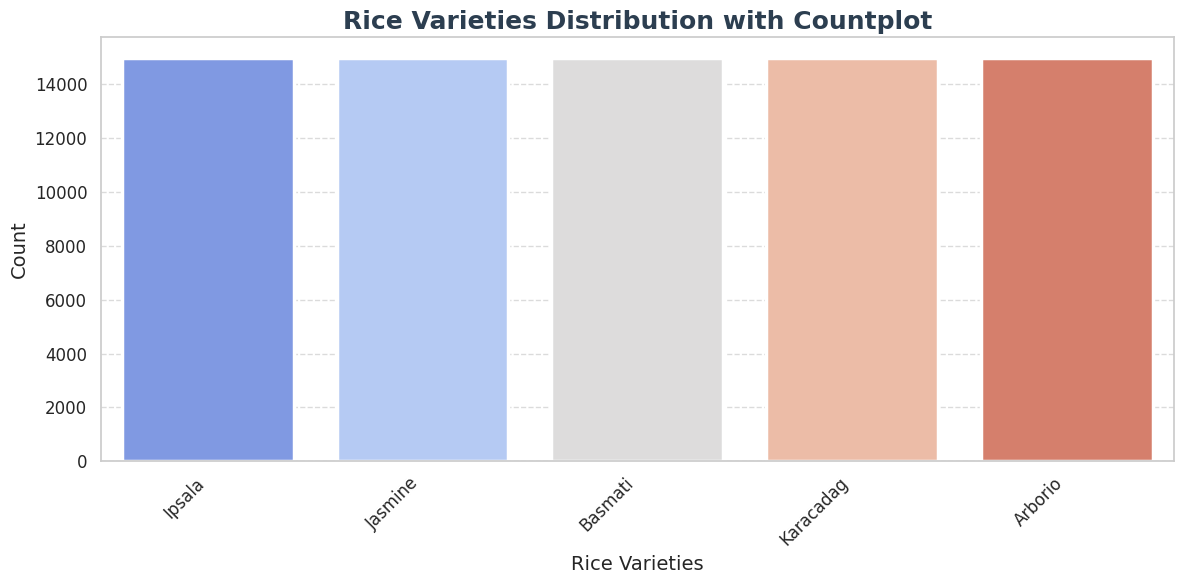

In [15]:
def unique_distribution_plot(dataframe):
    """Plot a countplot for rice varieties distribution """
    
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    
    # Create a countplot
    sns.countplot(x='label', data=dataframe, palette="coolwarm", linewidth=2.5)
    
    # Customize the title and labels
    plt.title('Rice Varieties Distribution with Countplot', fontsize=18, fontweight='bold', color='#2c3e50')
    plt.xlabel('Rice Varieties', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Customize tick labels and add grid
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
unique_distribution_plot(df)

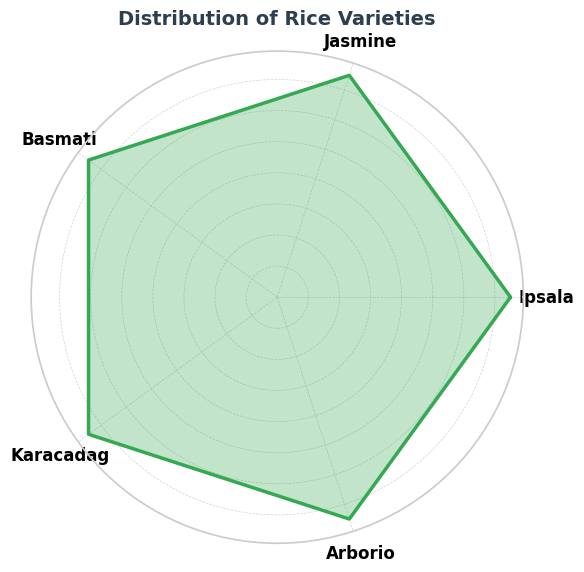

In [16]:
def radar_chart(dataframe):
    """Create a professional and compact radar chart to show the distribution of rice varieties."""
    
    # Count the number of occurrences of each rice variety
    label_counts = dataframe['label'].value_counts()
    
    # Set the number of variables (labels)
    categories = label_counts.index
    values = label_counts.values
    
    # Create an array of angles for each category
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values = values.tolist()
    
    # Make the plot circular
    values += values[:1]
    angles += angles[:1]
    
    # Create the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='#34a853', alpha=0.3)  
    ax.plot(angles, values, color='#34a853', linewidth=2.5) 
    
    # Customize the labels and grid
    ax.set_yticklabels([])  # Hide radial ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, color='black', fontweight='bold')
    
    # Set the title with a more professional look
    ax.set_title('Distribution of Rice Varieties', fontsize=14, fontweight='bold', color='#2c3e50')
    
    # Add a grid with a more subtle color 
    ax.grid(color='#d3d3d3', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

radar_chart(df)

# <span style="color: #006400;">4 | CNN Model</span>

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [18]:
# Define the CNN class
class CNN(nn.Module):
    def __init__(self, unique_classes):
        super(CNN, self).__init__()
        
        ####  CONVs (Feature Extractors)
        self.conv_layers = nn.Sequential(
            # First Convolutional Layer
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            nn.ReLU(),  # Apply ReLU activation function
            nn.MaxPool2d(kernel_size=(2, 2)),  # Reduce spatial dimensions by half
            nn.BatchNorm2d(32),  # Normalize the outputs of the previous layer
            
            # Second Convolutional Layer
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),  # Apply ReLU activation function
            nn.MaxPool2d(kernel_size=(2, 2)),  # Further reduce spatial dimensions
            nn.BatchNorm2d(64),  # Normalize the outputs of the previous layer
            
            # Third Convolutional Layer
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            nn.ReLU(),  # Apply ReLU activation function
            nn.MaxPool2d(kernel_size=(2, 2)),  # Further reduce spatial dimensions
            nn.BatchNorm2d(128),  # Normalize the outputs of the previous layer
        )
        
        # Fully Connected (Dense) Layers (Classifier)
        # To calculate the flattened size dynamically based on input image dimensions
        self.flattened_size = self._get_conv_output((3, 250, 250))  # Example input size: (3, 250, 250)
        
        self.dense_layers = nn.Sequential(
            nn.Linear(self.flattened_size, 128),  # Fully connected layer: From flattened features to 128 units
            nn.ReLU(),  # Apply ReLU activation function
            nn.Dropout(0.5),
            nn.Linear(128, 64),  # Fully connected layer: From 128 units to 64 units
            nn.ReLU(),  # Apply ReLU activation function
            nn.Linear(64, unique_classes)  # Final layer: From 64 units to the number of classes
        )
    
    def _get_conv_output(self, shape):
        """Calculate the output size after passing through the conv layers"""
        x = torch.zeros(1, *shape)  # Create a dummy tensor with the input shape
        x = self.conv_layers(x)  # Pass through the conv layers
        return int(torch.prod(torch.tensor(x.size())))  # Flatten the output size
    
    # Forward pass
    def forward(self, X):
        out = self.conv_layers(X)  # Pass input through the convolutional layers
        out = out.view(out.size(0), -1)  # Flatten the output from the convolutional layers
        out = self.dense_layers(out)  # Pass the flattened output through the dense layers
        return out  # Return the final output (logits or class scores)

# Define the device (GPU or CPU)
dgpu = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Instantiate the model with the desired number of classes (e.g., 5 classes)
unique_classes = 5  # Example for 5 classes
model = CNN(unique_classes)

# Move the model to the specified device (GPU or CPU)
model.to(dgpu)

# Print the model architecture (optional)
print(model)


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (dense_layers): Sequential(
    (0): Linear(in_features=107648, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, ou

### **<span style="color: #006400">Training and Validation Loop</span>**

After defining the model, optimizer, and loss function, we proceed to train the model for a specified number of epochs. During training, the model's weights are updated based on the backpropagation of errors, and we evaluate the performance on the validation set to ensure that the model is generalizing well.

We track the training and validation losses and accuracies over each epoch to monitor the model's progress. The training loop updates the model’s parameters, while the validation loop checks its performance on unseen data.

At the end of training, the model is saved for future use.


#### <span style="color: #008000"><b>CNN Architecture Overview</b></span>

The following is an analysis of a Convolutional Neural Network (CNN) architecture, consisting of convolutional layers followed by dense layers. This network is designed for image classification tasks.
###
## <span style="color: #008000"><b>1. Convolutional Layers (conv_layers)</b></span>

The **convolutional layers** of the model are used to automatically extract features from input images. Here's a breakdown:

- **Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))**:
  - This is the first convolutional layer that takes an image with 3 channels (RGB) and applies 32 filters of size 3x3 to extract feature maps.
  - The stride is 1, meaning the filter moves one pixel at a time across the image.

- **ReLU Activation**:
  - After the convolution operation, the ReLU (Rectified Linear Unit) activation function is applied to introduce non-linearity, allowing the model to learn more complex patterns.

- **MaxPooling2d(kernel_size=(2, 2), stride=(2, 2))**:
  - This pooling layer reduces the spatial dimensions of the feature map by taking the maximum value in each 2x2 region. It helps reduce computation and control overfitting.

- **BatchNorm2d**:
  - Batch normalization is applied after each convolutional layer to stabilize and accelerate training by normalizing the output of each layer.

The sequence of these operations is repeated with increasing filter sizes:
- **Conv2d(32, 64)** followed by **ReLU**, **MaxPool**, and **BatchNorm**.
- **Conv2d(64, 128)** followed by **ReLU**, **MaxPool**,### and **BatchNorm**.

## <span style="color: #008000"><b>2. Dense Layers (dense_layers)</b></span>

The **dense layers** are responsible for classifying the features extracted by the convolutional layers.

- **Linear(in_features=107648, out_features=128)**:
  - This fully connected layer connects the 107648 features (flattened from the convolutional layers) to 128 neurons, where each neuron computes a weighted sum of the inputs.
  
- **ReLU Activation**:
  - A ReLU activation function is applied after the first dense layer to introduce non-linearity.
  
- **Dropout(p=0.5)**:
  - Dropout is applied with a probability of 0.5, meaning half of the neurons are randomly ignored during training to prevent overfitting and promote generalization.

- **Linear(in_features=128, out_features=64)**:
  - This fully connected layer reduces the number of features to 64.

- **Linear(in_features=64, out_features=5)**:
  - The final fully connected layer maps the 64 features to 5 output classes, which corresponds to the number of ###classes in the classification problem.

## <span style="color: #008000"><b>3. Summary of CNN Architecture</b></span>

- The network is deep with three convolutional blocks, each followed by pooling and batch normalization.
- After the feature extraction, the fully connected layers reduce the features progressively to the final 5-class output.
- Dropout is used to improve generalization and prevent overfitting during training.
res=5)</span>  
   - Final output layer with 5 units for classification.


In [19]:
# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Number of epochs for training
num_epochs = 5

# Initialize arrays to store loss and accuracy for each epoch
train_losses = np.zeros(num_epochs)
val_losses = np.zeros(num_epochs)
train_accs = np.zeros(num_epochs)
val_accs = np.zeros(num_epochs)

# Training loop over the specified number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    t0 = datetime.now()
    
    train_loss = []
    val_loss = []
    n_correct_train = 0
    n_total_train = 0

    # Training phase
    for images, labels in train_loader:
        # Move images and labels to the device (GPU or CPU)
        images = images.to(dgpu)
        labels = labels.to(dgpu)

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass: Compute predicted labels by passing images to the model
        y_pred = model(images)
        loss = criterion(y_pred, labels)  # Compute the loss

        # Backward pass: Compute gradients
        loss.backward()
        optimizer.step()

        # Store the training loss
        train_loss.append(loss.item())

        # Compute training accuracy
        _, predicted_labels = torch.max(y_pred, 1)
        n_correct_train += (predicted_labels == labels).sum().item()
        n_total_train += labels.shape[0]

    train_loss = np.mean(train_loss)
    train_losses[epoch] = train_loss
    train_accs[epoch] = n_correct_train / n_total_train

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    n_correct_val = 0
    n_total_val = 0
    with torch.no_grad():  # No need to track gradients during validation
        for images, labels in val_loader:
            images = images.to(dgpu)
            labels = labels.to(dgpu)

            # Forward pass: Compute predicted labels for validation set
            y_pred = model(images)
            loss = criterion(y_pred, labels)

            # Store the validation loss
            val_loss.append(loss.item())

            # Compute validation accuracy
            _, predicted_labels = torch.max(y_pred, 1)
            n_correct_val += (predicted_labels == labels).sum().item()
            n_total_val += labels.shape[0]

    val_loss = np.mean(val_loss)
    val_losses[epoch] = val_loss
    val_accs[epoch] = n_correct_val / n_total_val
    duration = datetime.now() - t0

    # Print the metrics for the current epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accs[epoch]:.4f} | '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accs[epoch]:.4f} | '
          f'Duration: {duration}')

# Optionally, save the model after training
torch.save(model.state_dict(), "rice_classification_model.pth")


Epoch [1/5] - Train Loss: 0.2153, Train Accuracy: 0.9311 | Val Loss: 101.7783, Val Accuracy: 0.2794 | Duration: 0:04:19.690731
Epoch [2/5] - Train Loss: 0.0791, Train Accuracy: 0.9776 | Val Loss: 0.0327, Val Accuracy: 0.9898 | Duration: 0:04:25.855237
Epoch [3/5] - Train Loss: 0.0529, Train Accuracy: 0.9843 | Val Loss: 0.0179, Val Accuracy: 0.9952 | Duration: 0:04:27.933946
Epoch [4/5] - Train Loss: 0.0526, Train Accuracy: 0.9851 | Val Loss: 0.0184, Val Accuracy: 0.9951 | Duration: 0:04:26.129938
Epoch [5/5] - Train Loss: 0.0468, Train Accuracy: 0.9873 | Val Loss: 0.0403, Val Accuracy: 0.9866 | Duration: 0:04:25.454312


# <span style="color: #006400;">5 | Training & Validation Results</span>

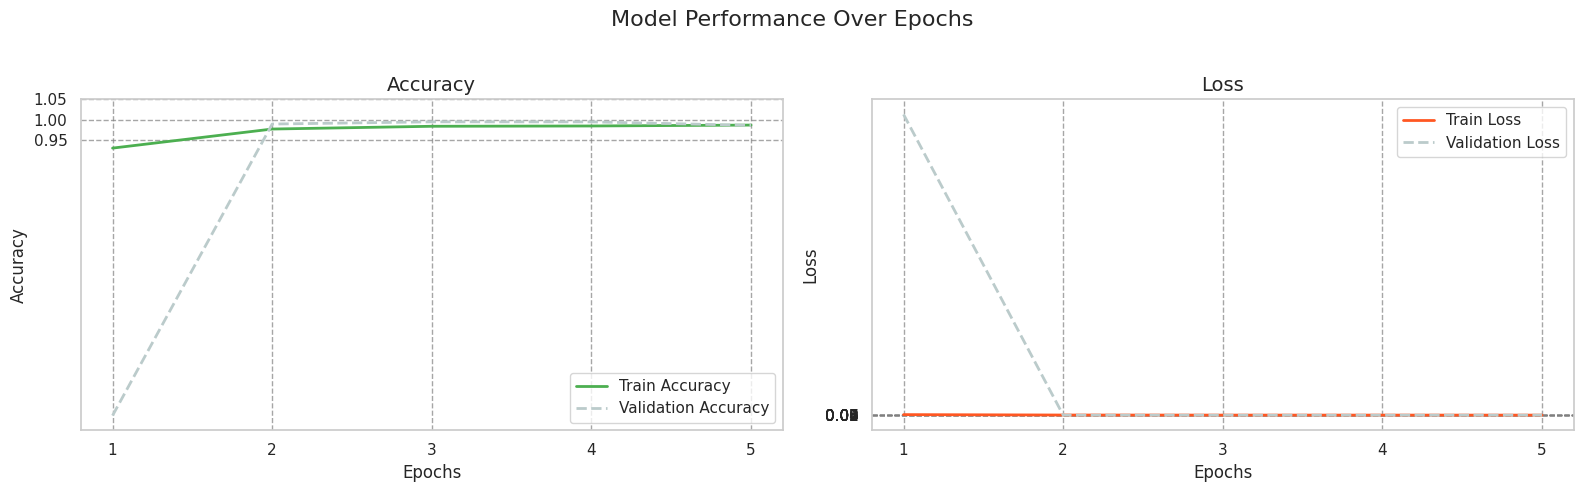

In [29]:
# Define a range of epochs for the x-axis
epochs = np.arange(1, num_epochs + 1)

# Initialize figure and axes for side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Model Performance Over Epochs', fontsize=16)

# Plot Accuracy
ax[0].plot(epochs, train_accs, label='Train Accuracy', linewidth=2, color='#4caf50')  # Green for training accuracy
ax[0].plot(epochs, val_accs, label='Validation Accuracy', linewidth=2, linestyle='--', color='#bbcbcb')  # Light grey for validation accuracy
ax[0].set_title('Accuracy', fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].set_xticks(epochs)
ax[0].set_yticks(np.arange(0.95, 1.05, 0.05))  # Set y-axis ticks
ax[0].legend()
ax[0].grid(True, linestyle='--', color='gray', alpha=0.7)
ax[0].set_facecolor('white')

# Plot Loss
ax[1].plot(epochs, train_losses, label='Train Loss', linewidth=2, color='#ff5722')  # Red for training loss
ax[1].plot(epochs, val_losses, label='Validation Loss', linewidth=2, linestyle='--', color='#bbcbcb')  # Light grey for validation loss
ax[1].set_title('Loss', fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Loss', fontsize=12)
ax[1].set_xticks(epochs)
ax[1].set_yticks(np.arange(0, 0.1, 0.01))  # Adjust y-axis range for loss
ax[1].legend()
ax[1].grid(True, linestyle='--', color='gray', alpha=0.7)
ax[1].set_facecolor('white')

# Adjust layout to make room for the super title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()

#### <span style="color:#006400"><b>Analysis of the Model Performance Plots</b></span>

##### <span style="color:#006400"><b>Left Plot (Accuracy)</b></span>:

1. **Train Accuracy**: The training accuracy quickly reaches around 1 and then remains stable, indicating that the model has learned the training data very well.

2. **Validation Accuracy**: The validation accuracy also reaches close to 1 and stays consistent. This suggests the model is performing well on the validation data too.

##### <span style="color:#006400"><b>Right Plot (Loss)</b></span>:

1. **Train Loss**: There's a sharp drop in training loss initially, which then stabilizes. This shows that the model achieved optimal performance quite early in the training process.

2. **Validation Loss**: The validation loss also reaches a stable level after the first epoch, with little to no fluctuation.

##### <span style="color:#006400"><b>Overall Analysis</b></span>:

The model seems to quickly reach optimal accuracy and loss values, performing well on both training and validation data. However, this behavior might indicate **overfitting**, as both training and validation metrics reach stability very early, with little difference between them.
e between them.
e between them.
e between them.


In [30]:
# Model evaluation loop
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    t0 = datetime.now()
    test_loss = []
    n_correct = 0
    n_total = 0

    # Iterate through the test dataset
    for images, labels in test_loader:
        images = images.to(device)  # Move images to device (GPU/CPU)
        labels = labels.to(device)  # Move labels to device

        # Forward pass
        y_pred = model(images)
        loss = criterion(y_pred, labels)

        # Collect the loss
        test_loss.append(loss.item())

        # Calculate accuracy
        _, prediction = torch.max(y_pred, 1)
        n_correct += (prediction == labels).sum().item()
        n_total += labels.shape[0]

    # Calculate average test loss
    test_loss = np.mean(test_loss)
    test_acc = n_correct / n_total
    dt = datetime.now() - t0
    
    # Print the results
    print(f"Loss: {test_loss:.4f}\nAccuracy: {test_acc:.4f}\nDuration: {dt}")

Loss: 0.0389
Accuracy: 0.9870
Duration: 0:00:28.630012


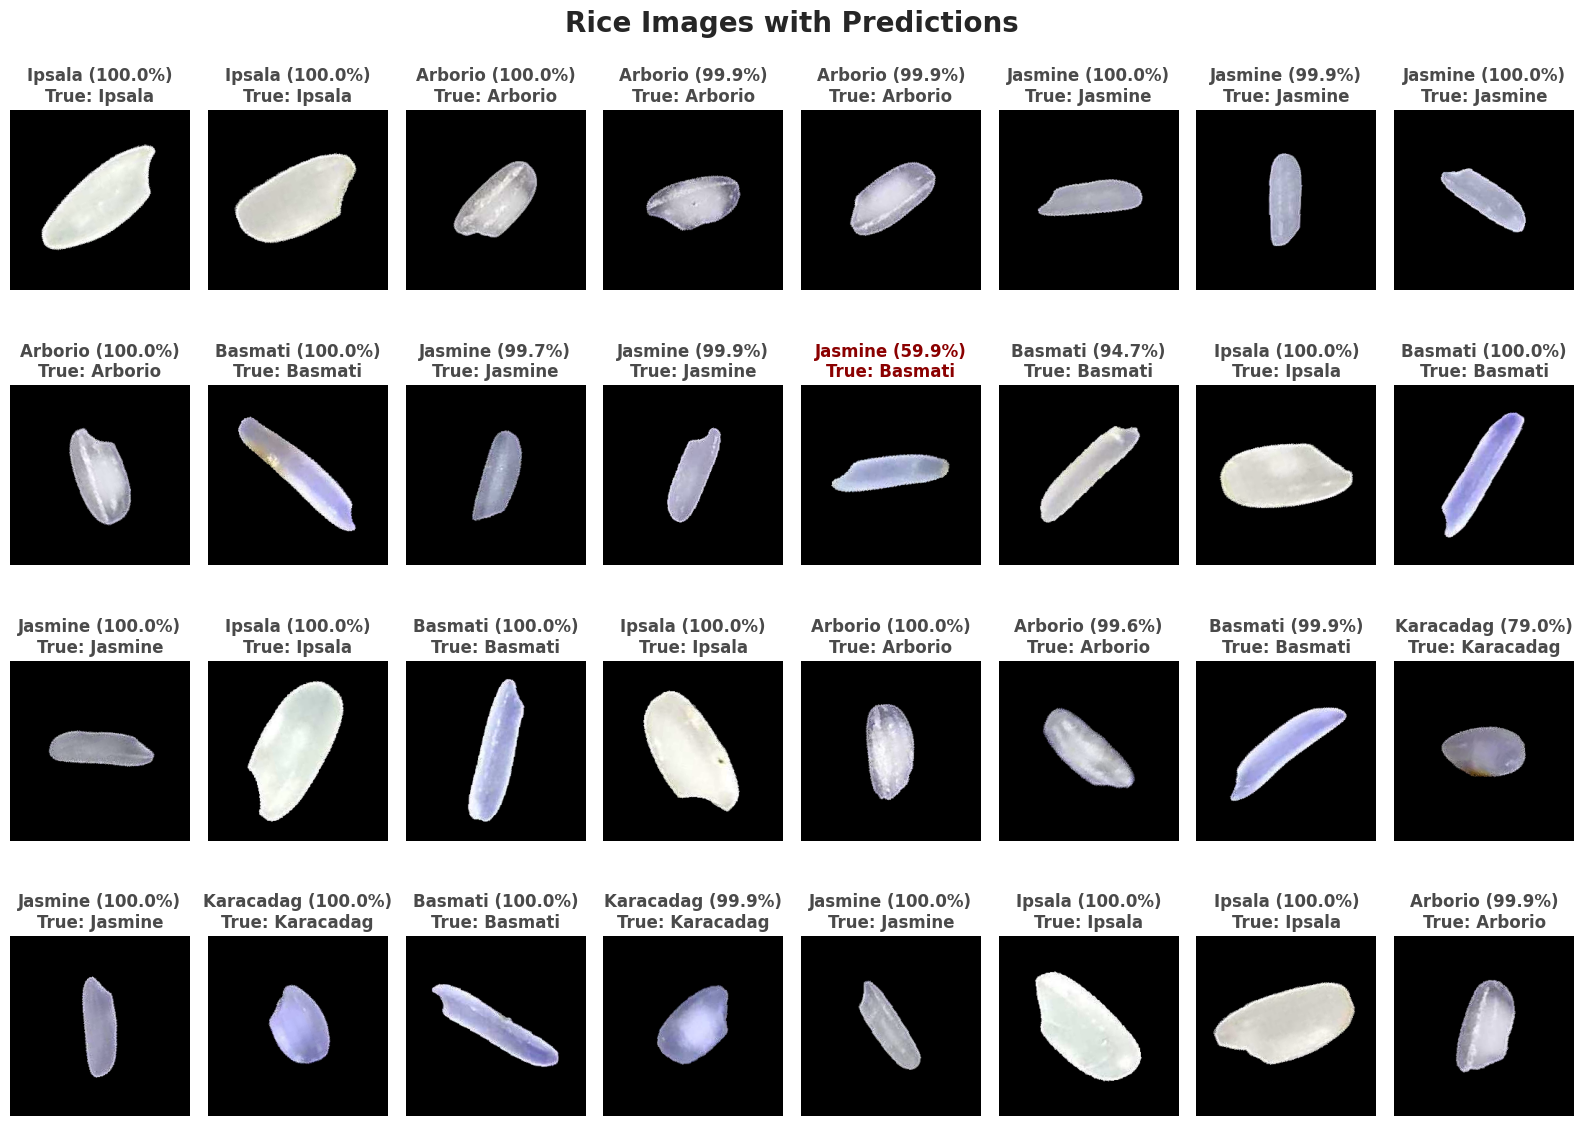

In [34]:
# Move model to CPU
cpu_model = model.cpu()

# Rice names
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Get a batch of test data
for images_batch, true_labels in test_loader:
    break

# Simplified function to display predictions and true labels for images
def display_predictions(model, images, labels, class_names, num_images=32):
    plt.figure(figsize=(16, 12))
    plt.suptitle('Rice Images with Predictions', fontsize=20, fontweight='bold')

    for i in range(num_images):
        ax = plt.subplot(4, 8, i + 1)
        img = images[i].cpu().numpy().transpose((1, 2, 0))
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        plt.axis('off')
        
        # Model prediction
        with torch.no_grad():
            output = model(images[i].unsqueeze(0))
            predicted_label = torch.argmax(output, dim=1).item()
            confidence = torch.softmax(output, dim=1)[0, predicted_label].item() * 100

        # Display labels with improved readability
        true_label = labels[i].item()
        color = '#4a4a4a' if predicted_label == true_label else '#8b0000'
        plt.title(f"{class_names[predicted_label]} ({confidence:.1f}%)\nTrue: {class_names[true_label]}",
                  color=color, fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Display predictions
display_predictions(cpu_model, images_batch, true_labels, class_names)


In [35]:
# Move model to GPU
model = model.to(dgpu)

# Define y_true and y_pred lists to store true and predicted labels
y_true, y_pred = [], []

# Generate y_true and y_pred lists from test data
for images, labels in test_loader:
    images = images.to(dgpu)               # Transfer images to GPU
    outputs = model(images)                # Compute model output
    _, pred = torch.max(outputs, 1)        # Get predicted labels

    # Append labels to lists
    y_true.extend(labels.numpy())          # True labels
    y_pred.extend(pred.cpu().numpy())      # Predicted labels

# Now you can use y_true and y_pred in confusion_matrix or for further analysis.



🔹 Classification Report 🔹
📊 Detailed Classification Report 📊
              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      2250
     Basmati       1.00      0.95      0.98      2250
      Ipsala       1.00      1.00      1.00      2250
     Jasmine       0.95      1.00      0.97      2250
   Karacadag       1.00      0.98      0.99      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250



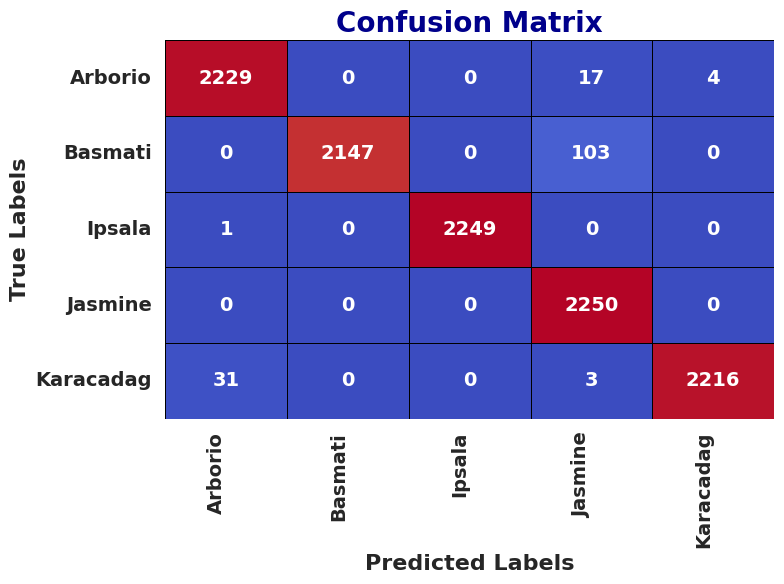

In [52]:
# Assuming y_true and y_pred have been populated from the model predictions

# Rice names (replacing the rice_variety_labels dictionary)
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Generate a classification report
print("\n🔹 Classification Report 🔹")
report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0)

# Display formatted classification report
print("="*60)
print("📊 Detailed Classification Report 📊")
print("="*60)
print(report)
print("="*60)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting confusion matrix with improved color scheme and formatting
plt.figure(figsize=(8, 6))

# Improved color palette and heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", annot_kws={"size": 14, "weight": "bold", "color": "white"}, 
            xticklabels=class_names, yticklabels=class_names, cbar=False, linewidths=0.5, linecolor='black')

# Title and axis labels
plt.title('Confusion Matrix', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Predicted Labels', fontsize=16, fontweight='bold')
plt.ylabel('True Labels', fontsize=16, fontweight='bold')

# Rotating tick labels to make them more readable
plt.xticks(rotation=90, ha="right", fontsize=14, fontweight='bold')
plt.yticks(rotation=0, fontsize=14, fontweight='bold')

# Adding a color bar with custom ticks
plt.tight_layout()
plt.show()

### Matrix Analysis:
1. <span style="font-weight: bold; color: #2E8B57;">The main diagonal</span> (from top left to bottom right) shows the correctly predicted results:
   - <span style="font-weight: bold; color: #2E8B57;">Arborio</span>: 2229 samples correctly predicted.
   - <span style="font-weight: bold; color: #2E8B57;">Basmati</span>: 2147 samples correctly predicted.
   - <span style="font-weight: bold; color: #2E8B57;">Ipsala</span>: 2249 samples correctly predicted.
   - <span style="font-weight: bold; color: #2E8B57;">Jasmine</span>: 2250 samples correctly predicted.
   - <span style="font-weight: bold; color: #2E8B57;">Karacadag</span>: 2216 samples correctly predicted.

2. <span style="font-weight: bold; color: #2E8B57;">Model Errors</span>:
   - <span style="font-weight: bold; color: #2E8B57;">Arborio</span> was misclassified as <span style="font-weight: bold; color: #2E8B57;">Jasmine</span> (17 samples).
   - <span style="font-weight: bold; color: #2E8B57;">Arborio</span> was misclassified as <span style="font-weight: bold; color: #2E8B57;">Karacadag</span> (4 samples).
   - <span style="font-weight: bold; color: #2E8B57;">Basmati</span> was misclassified as <span style="font-weight: bold; color: #2E8B57;">Ipsala</span> (103 samples).
   - <span style="font-weight: bold; color: #2E8B57;">Ipsala</span> was misclassified as <span style="font-weight: bold; color: #2E8B57;">Arborio</span> (1 sample).
   - <span style="font-weight: bold; color: #2E8B57;">Karacadag</span> was misclassified as <span style="font-weight: bold; color: #2E8B57;">Arborio</span> (31 samples) and as <span style="font-weight: bold; color: #2E8B57;">Jasmine</span> (3 samples).

### Key Points:
- The model performs well in recognizing most rice types since a large number of samples are correctly classified.
- There are <span style="font-weight: bold; color: #2E8B57;">minor misclassifications</span>, particularly between <span style="font-weight: bold; color: #2E8B57;">Basmati</span> and <span style="font-weight: bold; color: #2E8B57;">Ipsala</span>, which might indicate similarities in their features.
- The <span style="font-weight: bold; color: #2E8B57;">overall number of errors</span> (outside the main diagonal) is relatively low, suggesting decent model performance.


# <span style="color: #006400;">6 | Finish</span>

### <span style="color:#006400"><b>Author: Marjan Atashkar</b></span>

---

<span style="font-size: 18px; color:#006400"><b>✅ If you like my notebook, please upvote it ✅</spa/span>
